## Gradient Descent

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from helper import *

# Introduction to Gradient Descent in NLP

Gradient Descent is an optimization algorithm used to minimize a cost function in machine learning models, particularly in NLP tasks. It works by iteratively adjusting model parameters in the direction that reduces the cost function the most.

The general update rule for Gradient Descent is:

$$
\theta^{(t+1)} = \theta^{(t)} - \alpha \frac{\partial J(\theta)}{\partial \theta^{(t)}}
$$

Where:
- The current parameter value is:
  $
  \theta^{(t)}
  $

- The learning rate is:
  $
  \alpha
  $

- The gradient of the cost function with respect to the parameters is:
  $
  \frac{\partial J(\theta)}{\partial \theta^{(t)}}
$

In [2]:
# Let's create our training data 12 pairs {x_i, y_i}
# We'll try to fit the straight line model to these data
data = np.array([[0.03,0.19,0.34,0.46,0.78,0.81,1.08,1.18,1.39,1.60,1.65,1.90],
                 [0.67,0.85,1.05,1.00,1.40,1.50,1.30,1.54,1.55,1.68,1.73,1.60]])

In [3]:
# Let's define our model -- just a straight line with intercept theta[0] and slope theta[1]
def model(theta, x):
    y_pred = theta[0] + theta[1] * x
    return y_pred

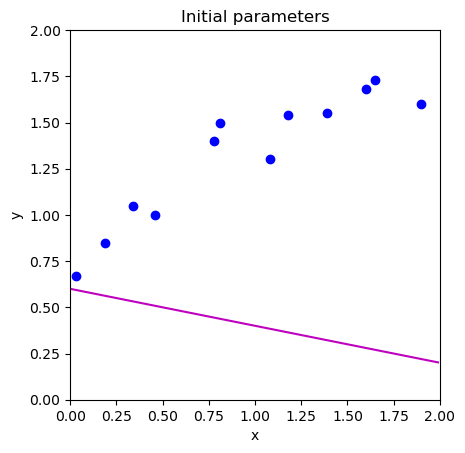

In [4]:
# Initialize the parameters to some arbitrary values and draw the model
theta = np.zeros((2, 1))
theta[0] = 0.6      # Intercept
theta[1] = -0.2     # Slope

# Draw the model with initial parameters
draw_model(data, model, theta, "Initial parameters")

Now let's compute the sum of squares loss for the training data

Let's just test that we got that right



In [5]:
loss = compute_loss(data[0,:],data[1,:],model,np.array([[0.6],[-0.2]]))
print('Your loss = %3.3f, Correct loss = %3.3f'%(loss, 12.367))

Your loss = 12.367, Correct loss = 12.367


Now let's plot the whole loss function

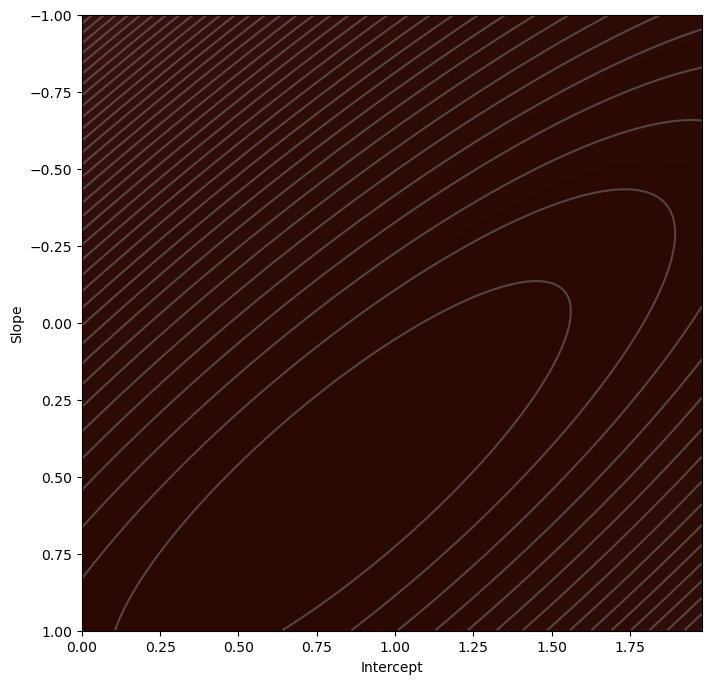

In [6]:
draw_loss_function(compute_loss, data, model)

### Sum of Squares Loss Function:

The sum of squares loss function is given by:

$$
J(\theta) = \sum_{i=1}^{N} \left( y_{\text{pred}}^{(i)} - y_{\text{true}}^{(i)} \right)^2
$$


Where:
- $ \ y_{\text{pred}}^{(i)} = \theta_0 + \theta_1 x^{(i)} \ $ is the predicted value for the $ \ i\ $-th data point.
- $ \ y_{\text{true}}^{(i)} \ $ is the actual value for the \(i\)-th data point.
- $ \ N \ $ is the number of data points.

---

### Gradient Calculation:

We need to compute the partial derivatives of the loss function with respect to $\ \theta_0 \ $ and $ \ \theta_1 \ $ (the intercept and slope, respectively).

#### Derivative with respect to $ \ \theta_0 \ $ (intercept):

$$
\frac{\partial J(\theta)}{\partial \theta_0} = \frac{2}{N} \sum_{i=1}^{N} \left( y_{\text{pred}}^{(i)} - y_{\text{true}}^{(i)} \right)
$$


#### Derivative with respect to $ \ \theta_1 \ $ (slope):

$$
\frac{\partial J(\theta)}{\partial \theta_1} = \frac{2}{N} \sum_{i=1}^{N} \left( y_{\text{pred}}^{(i)} - y_{\text{true}}^{(i)} \right) x^{(i)}
$$


Where:
- $ \ y_{\text{pred}}^{(i)} = \theta_0 + \theta_1 x^{(i)} \ $ is the predicted value for the $ \ i\ $-th data point.
- $ \ x^{(i)} \ $ is the feature value for the $ \ i\ $-th data point.

In [7]:
def compute_gradient(data_x, data_y, theta):
    """
    Computes the gradient of the sum of squares loss function with respect to theta (parameters).
    
    Parameters:
    data_x : array-like
        Input feature data (independent variable).
    data_y : array-like
        True output data (dependent variable).
    theta : array-like
        Model parameters (weights: intercept and slope).
    
    Returns:
    gradient : array-like
        The gradient of the loss function with respect to theta_0 and theta_1.
    """
    
    # Number of data points
    N = len(data_x)
    
    # Model predictions: y_pred = theta[0] + theta[1] * x
    y_pred = theta[0] + theta[1] * data_x
    
    # Compute gradients
    dl_dtheta0 = (2 / N) * np.sum(y_pred - data_y)  # Derivative w.r.t. theta_0 (intercept)
    dl_dtheta1 = (2 / N) * np.sum((y_pred - data_y) * data_x)  # Derivative w.r.t. theta_1 (slope)
    
    # Return the gradient as a column vector
    return np.array([[dl_dtheta0], [dl_dtheta1]])

In [8]:
# Compute the gradient using your function
gradient = compute_gradient(data[0,:], data[1,:], theta)
print("Your gradients: (%3.3f, %3.3f)" % (gradient[0], gradient[1]))

# Approximate the gradients with finite differences
delta = 0.0001

# Compute finite difference approximation for theta_0 (intercept)
dl_dtheta0_est = (compute_loss(data[0,:], data[1,:], model, theta + np.array([[delta], [0]])) - \
                  compute_loss(data[0,:], data[1,:], model, theta)) / delta

# Compute finite difference approximation for theta_1 (slope)
dl_dtheta1_est = (compute_loss(data[0,:], data[1,:], model, theta + np.array([[0], [delta]])) - \
                  compute_loss(data[0,:], data[1,:], model, theta)) / delta

print("Approx gradients: (%3.3f, %3.3f)" % (dl_dtheta0_est, dl_dtheta1_est))

# There might be small differences in the last significant figure because finite gradients is an approximation

Your gradients: (-1.825, -2.237)
Approx gradients: (-21.903, -26.839)


In [9]:
def gradient_descent_step(theta, data, model):
    """
    Performs one step of gradient descent.

    Parameters:
    - theta: Current parameters (intercept and slope).
    - data: The dataset (x and y values).
    - model: The model used to make predictions.

    Returns:
    - Updated theta after one gradient descent step.
    """

    # Step 1: Compute the gradient (you wrote this function above)
    gradient = compute_gradient(data[0, :], data[1, :], theta)

    # Step 2: Find the best step size alpha using line search function (above)
    # Use negative gradient as we are going downhill
    alpha = line_search(data, model, theta, -gradient)

    # Step 3: Update the parameters theta based on the gradient and step size alpha
    theta = theta + alpha * (-gradient)

    return theta

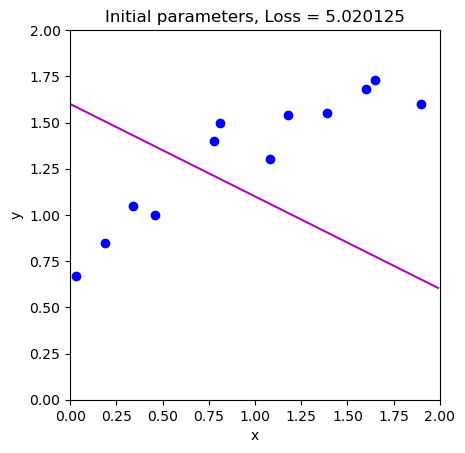

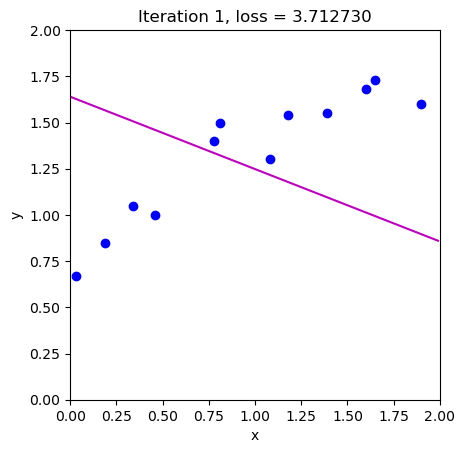

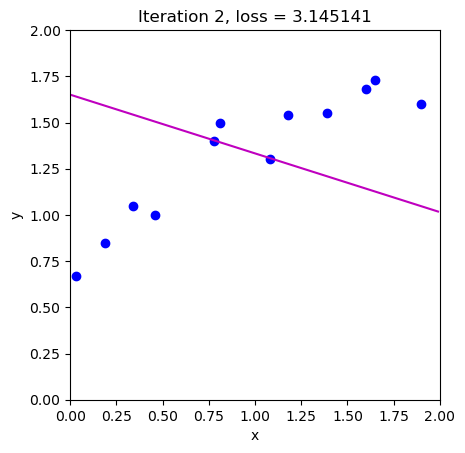

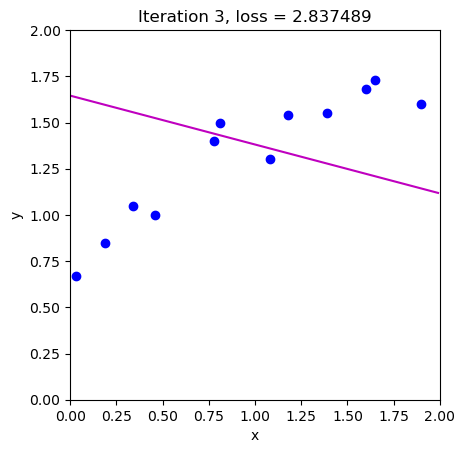

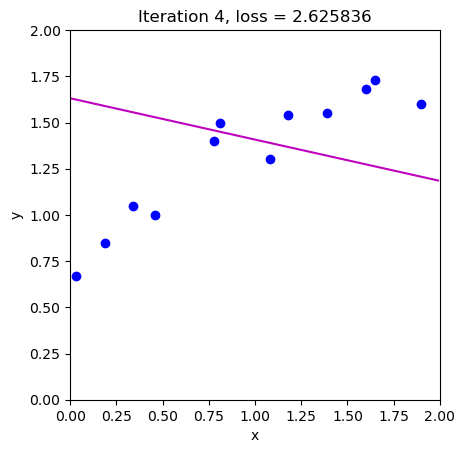

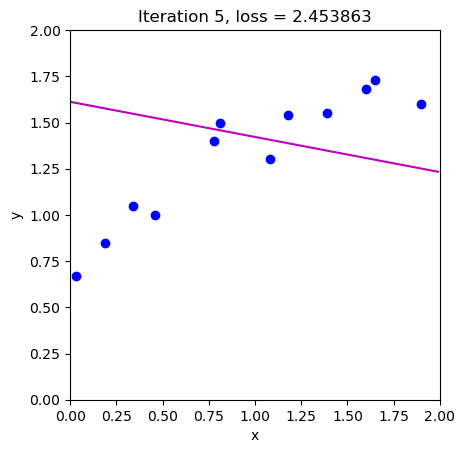

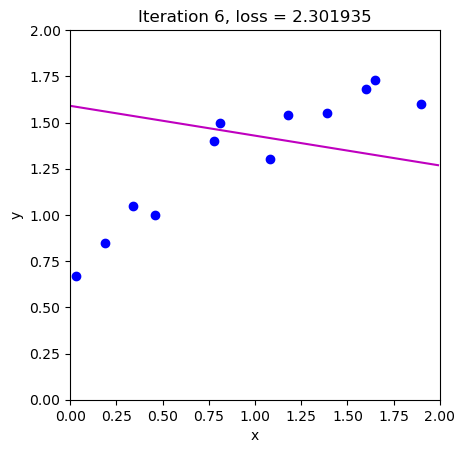

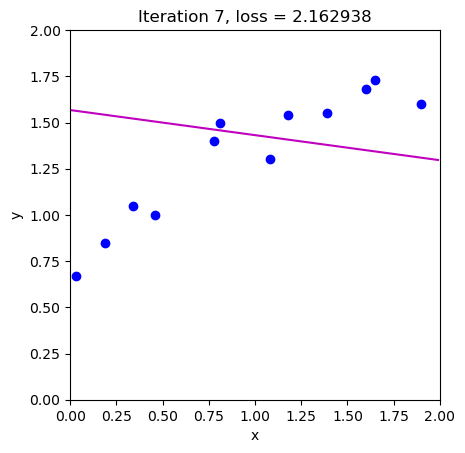

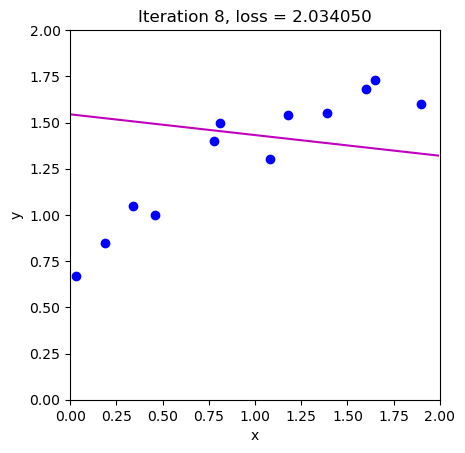

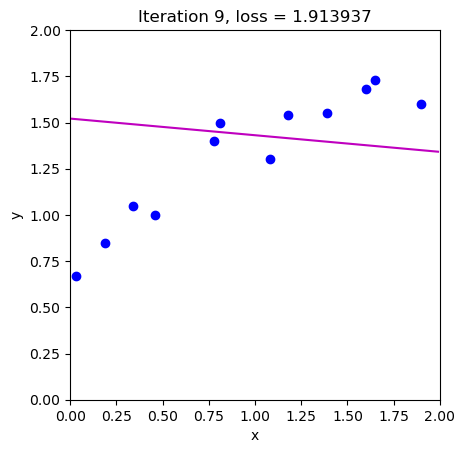

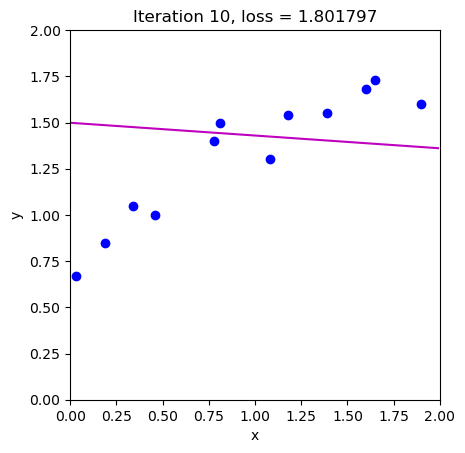

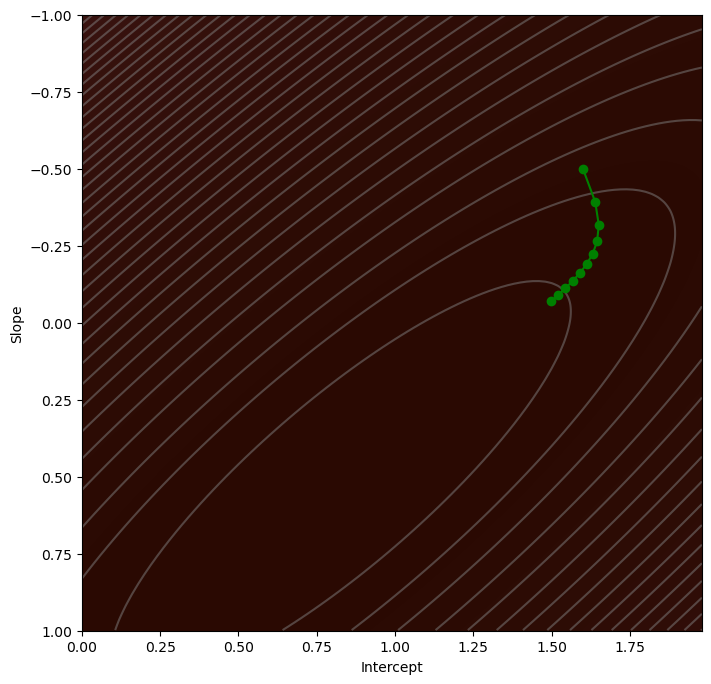

In [10]:
# Initialize the parameters and draw the model
n_steps = 10
theta_all = np.zeros((2, n_steps + 1))
theta_all[0, 0] = 1.6  # Initial intercept
theta_all[1, 0] = -0.5  # Initial slope

# Measure loss and draw initial model
loss = compute_loss(data[0, :], data[1, :], model, theta_all[:, 0:1])
draw_model(data, model, theta_all[:, 0:1], "Initial parameters, Loss = %f" % (loss))

# Repeatedly take gradient descent steps
for c_step in range(n_steps):
    # Do gradient descent step
    theta_all[:, c_step+1:c_step+2] = gradient_descent_step(theta_all[:, c_step:c_step+1], data, model)
    
    # Measure loss and draw model
    loss = compute_loss(data[0, :], data[1, :], model, theta_all[:, c_step+1:c_step+2])
    draw_model(data, model, theta_all[:, c_step+1], "Iteration %d, loss = %f" % (c_step + 1, loss))

# Draw the trajectory on the loss function
draw_loss_function(compute_loss, data, model, theta_all)

In [ ]:
def stochastic_gradient_descent_step(theta, data, model, learning_rate=0.01):
    """
    Performs one step of stochastic gradient descent.

    Parameters:
    - theta: Current parameters (intercept and slope).
    - data: The dataset (x and y values).
    - model: The model used to make predictions.
    - learning_rate: The learning rate for SGD.

    Returns:
    - Updated theta after one stochastic gradient descent step.
    """
    # Shuffle the data
    indices = np.random.permutation(data.shape[1])
    data_shuffled = data[:, indices]

    for i in range(data.shape[1]):
        x_i = data_shuffled[0, i]
        y_i = data_shuffled[1, i]

        # Compute the gradient for the current data point
        gradient = compute_gradient(np.array([x_i]), np.array([y_i]), theta)

        # Update the parameters theta based on the gradient and learning rate
        theta = theta - learning_rate * gradient

    return theta


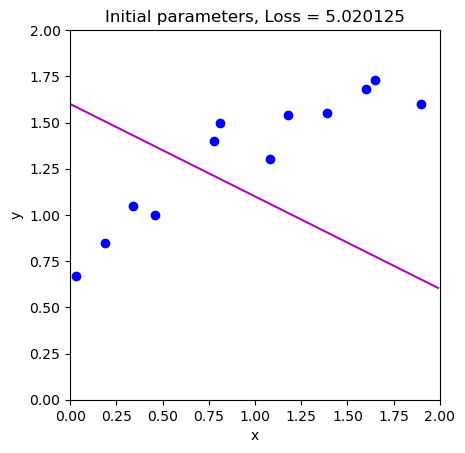

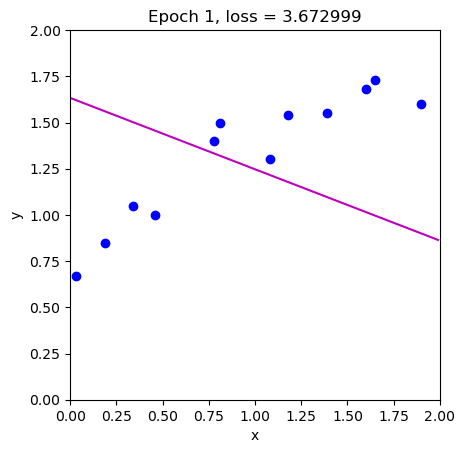

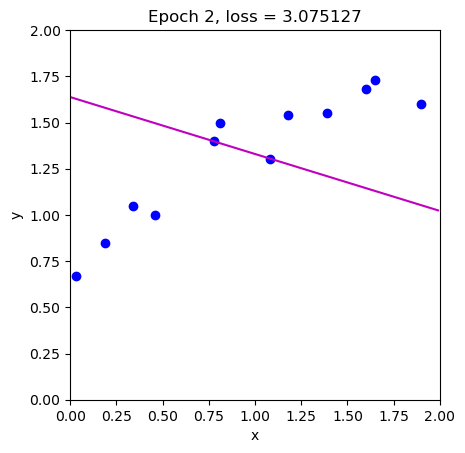

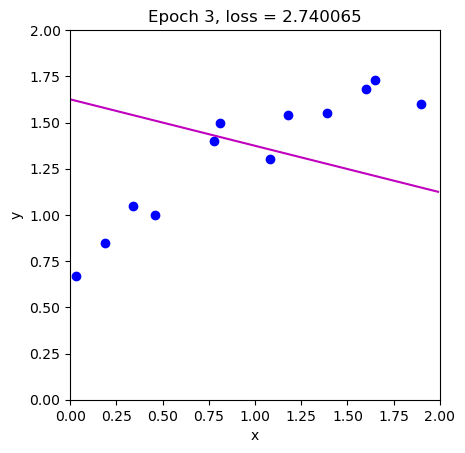

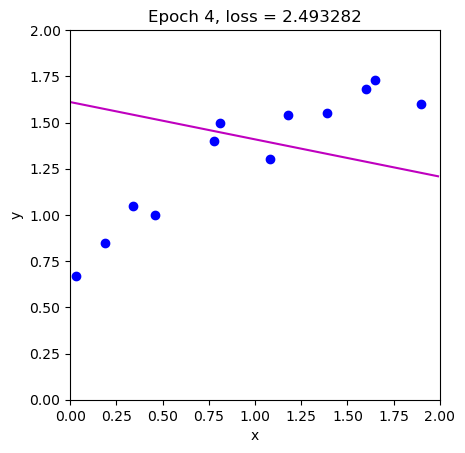

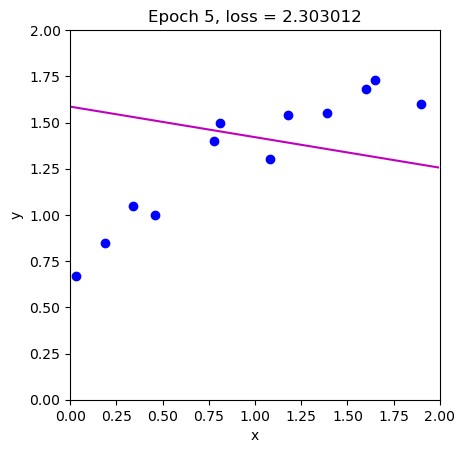

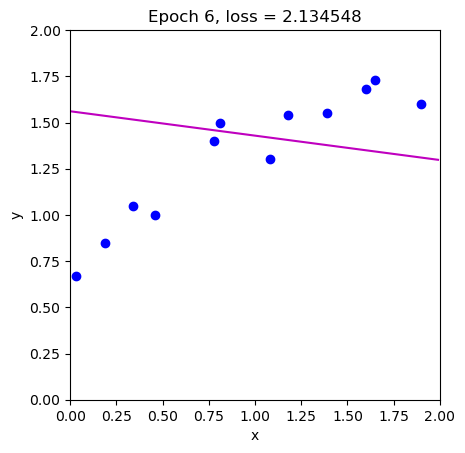

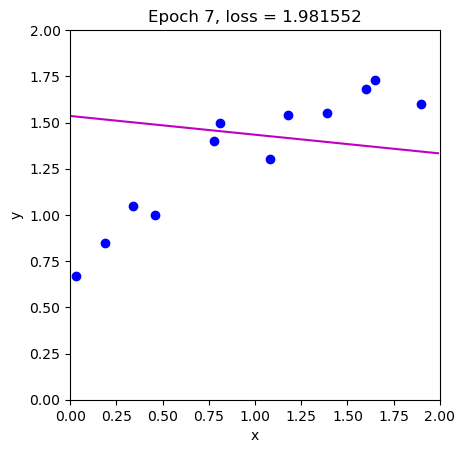

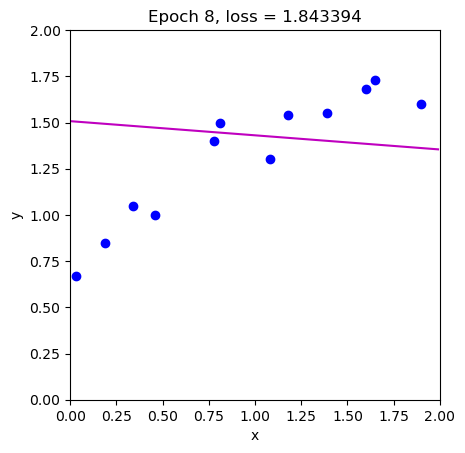

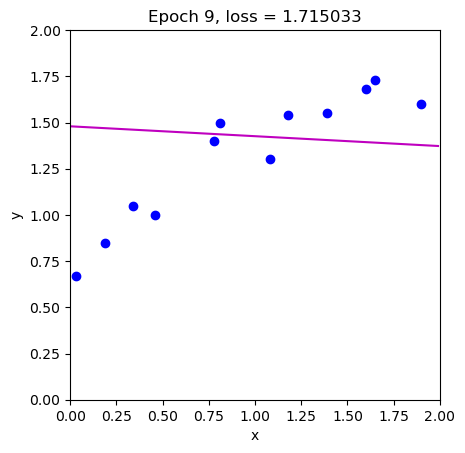

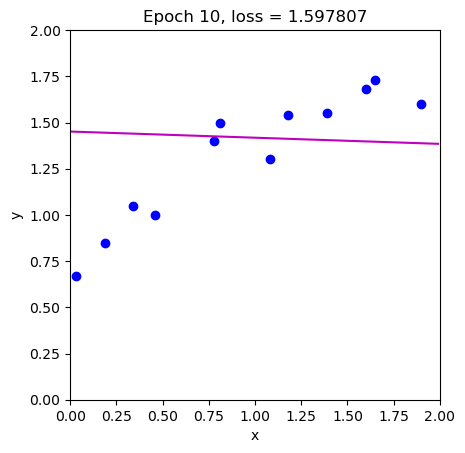

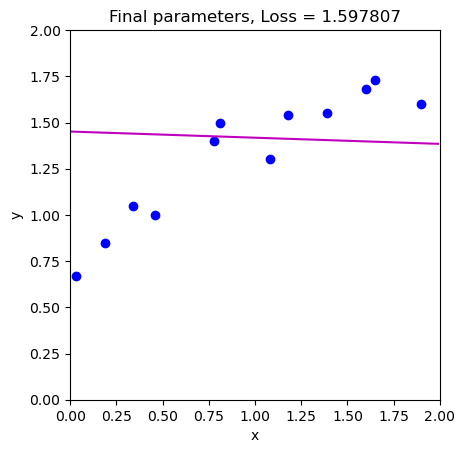

In [14]:
# Initialize the parameters and draw the model
n_epochs = 10
theta_sgd = np.zeros((2, 1))
theta_sgd[0] = 1.6  # Initial intercept
theta_sgd[1] = -0.5  # Initial slope

# Measure loss and draw initial model
loss = compute_loss(data[0, :], data[1, :], model, theta_sgd)
draw_model(data, model, theta_sgd, "Initial parameters, Loss = %f" % (loss))

# Repeatedly take stochastic gradient descent steps
for epoch in range(n_epochs):
    # Do stochastic gradient descent step
    theta_sgd = stochastic_gradient_descent_step(theta_sgd, data, model)

    # Measure loss and draw model
    loss = compute_loss(data[0, :], data[1, :], model, theta_sgd)
    draw_model(data, model, theta_sgd, "Epoch %d, loss = %f" % (epoch + 1, loss))

# Draw the final model
draw_model(data, model, theta_sgd, "Final parameters, Loss = %f" % (loss))